In [22]:
import matplotlib.pyplot as plt
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge,Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import explained_variance_score,mean_absolute_error
from time import time
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [3]:
data_base = pd.read_csv("data_base.csv")

In [18]:

data= data_base[["product_price", "weight", "lenght", "height", "width", "distance", "prix_de_livraison"]]
data= data.dropna()
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

#Perform Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_sc,y,test_size=0.2)


In [25]:
regressors = [
    KNeighborsRegressor(),
    GradientBoostingRegressor(),
    ExtraTreesRegressor(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    LinearRegression(),
    Lasso(),
    ElasticNet(),
    Ridge()
]

In [24]:
head = 10
for model in regressors[:head]:
    start = time()
    model.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(X_test)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
    print("\tR2 score:", r2_score(y_test, y_pred))
    print()

KNeighborsRegressor()
	Training time: 0.221s
	Prediction time: 0.552s
	Explained variance: 0.6683087160310747
	Mean absolute error: 4.209083779443255
	R2 score: 0.6680551943271749

GradientBoostingRegressor()
	Training time: 10.473s
	Prediction time: 0.026s
	Explained variance: 0.673880203049014
	Mean absolute error: 4.394666379144637
	R2 score: 0.6738801016765452

ElasticNet()
	Training time: 0.012s
	Prediction time: 0.000s
	Explained variance: 0.5028561284487614
	Mean absolute error: 5.4393779984105395
	R2 score: 0.5028554421541857

ExtraTreesRegressor()
	Training time: 18.800s
	Prediction time: 0.834s
	Explained variance: 0.7288874504015033
	Mean absolute error: 3.5284281513813216
	R2 score: 0.7288757241372776

RandomForestRegressor()
	Training time: 43.833s
	Prediction time: 0.794s
	Explained variance: 0.7253730426900199
	Mean absolute error: 3.6966828872782824
	R2 score: 0.7253520215618476

DecisionTreeRegressor()
	Training time: 0.631s
	Prediction time: 0.009s
	Explained variance

In [31]:
from sklearn.model_selection import GridSearchCV
parameters = { 'loss' : ['squared_error', 'absolute_error', 'huber', 'quantile'],
              'learning_rate' : (0.05,0.25,0.50,1),
              'criterion' : ['friedman_mse', 'mse', 'mae'],
              'max_features' : ['auto', 'sqrt', 'log2']
             }

In [32]:
grid = GridSearchCV(GradientBoostingRegressor(),parameters)
model = grid.fit(X_sc,y)
print(model.best_params_,'\n')
print(model.best_estimator_,'\n')

KeyboardInterrupt: 

In [ ]:
grid = GridSearchCV(KNeighborsRegressor(),parameters)
model = grid.fit(X_sc,y)
print(model.best_params_,'\n')
print(model.best_estimator_,'\n')

C:\Users\utilisateur\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='prix_de_livraison', ylabel='Density'>

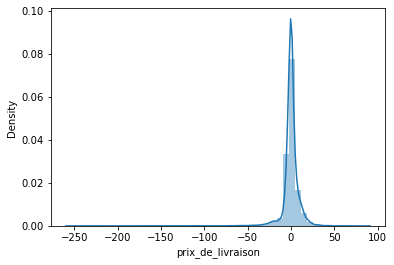

In [33]:
sns.distplot(y_pred-y_test)